In [1]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "true"
from tir_lib import *
from globals import *
import time
import importlib
import pandas as pd
import math
from tqdm import tqdm
import json
import sys
from utils import *

# MATH_HINTS = {
#     "complex calculation hint": "Wait, I can use Python to perform these complex calculations for this problem.```python\n",
#     "self reflection hint": "Wait, I can use Python to check if my approach is correct and refine it, if necessary.```python\n",
#     "general hint": "Wait, using python here may be a good idea.```python\n",
#     "alternative method hint": "Alternatively, I can use Python to explore an alternative method for solving this problem.```python\n",
#     "explore deeply hint": "Wait, I can explore deeply about this problem through python tools.```python\n",
#     "use python again hint": """Wait, I need to utilize Python code again to meticulously check to make sure I understand the question correctly as well as reasoning correctly.```python\n""",
# #     "check logic hint": "Maybe Python can assist in ensuring our logical deductions are sound.```python\n",
# #     "algebraic manipulation hint": "Wait, I can use Python to handle the algebraic manipulation and simplify the expression.```python\n",
# #     "solve equations hint": "Wait, I can use Python to solve this equation.```python\n",
# #     "series or sequences hint": "Wait, I can use Python to compute the terms of this series or sequence and identify patterns.```python\n",
# #     "validate assumption hint": "Wait, I can use Python to validate the assumptions I made in this calculation.```python\n",
# }

################## CONFIG #######
input_json = "wrongs_out_of_18k_heavily_checked.json"
target_TIR_json = "TIR_FULL_RESPONSES_ROUND_1_18k_DS.json"
not_worked_json = "AFTER_ROUND_1_RESPONSES_18k_DS.json"

def read_json_1(input_json):
    with open(input_json, "r") as f:
        data = json.load(f)
        return data
        
TIR_FULL_RESPONSES = []
AFTER_ROUND_RESPONSES = []
#################################
data_list = read_json_1(input_json)
N = len(data_list)
print(f"samples = {N}")
all_q = [item["problem"] for item in data_list]
all_r = [item["outputs"] for item in data_list]
all_a = [item["answer"] for item in data_list]

/opt/conda/lib/python3.11/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


samples = 7554


In [2]:
#################################
def get_tir(q,r,a):
    length_response = get_length(r)
    b = True
    code_generated_freq = r.count("```python")
    output_generated_freq = r.count("```output")
    ########### IF CODE IS PRESENT ######################
    if code_generated_freq == output_generated_freq + 1:
#         resp = get_code_completion(q, r)
        new_r = r + "```"
        resp_with_output = add_output_at_end(new_r)
        added_response, real_tir = get_extra_completion(q, resp_with_output)
        full_response = resp_with_output + added_response
    elif code_generated_freq > 0:
            added_r = insert_hint(q,r)
            resp = get_code_completion(q, added_r)
            new_r = added_r + resp + "```"
            resp_with_output, real_tir = add_output_at_end(new_r)
            added_response = get_extra_completion(q, resp_with_output)
            full_response = resp_with_output + added_response
    ########### IF CODE IS NOT PRESENT ######################
    elif code_generated_freq == 0:
        if length_response < 3200:
            added_r = add_prompt_at_end(r)
            resp = get_code_completion(q, added_r)
            new_r = added_r + resp + "```"
            resp_with_output, real_tir = add_output_at_end(new_r)
            added_response = get_extra_completion(q, resp_with_output)
            full_response = resp_with_output + added_response
        if length_response > 3200 - 1:
            added_r = insert_hint(q,r)
            resp = get_code_completion(q, added_r)
            new_r = added_r + resp + "```"
            resp_with_output, real_tir = add_output_at_end(new_r)
            added_response = get_extra_completion(q, resp_with_output)
            full_response = resp_with_output + added_response
    else:
        raise Exception("some issue with code if - else") 
        
    gen_ans = extract_boxed_texts(full_response)
    if gen_ans is None:
        gen_ans = get_answer(full_response)
    if real_tir and (gen_ans == str(a) or int(verify_correctness(gen_ans, a))):
        TIR_FULL_RESPONSES.append({"q": q, "r":full_response, "a":a})
        print("TIR succeeded !")
    else:
        AFTER_ROUND_RESPONSES.append({"q": q, "r":full_response, "a":a})
#         print("TIR failed...")
        b = False
    return b

In [16]:
# print(TIR_FULL_RESPONSES[2]["r"])

In [3]:
len(TIR_FULL_RESPONSES)

0

In [12]:
# 10*140/60

  0%|          | 0/76 [00:00<?, ?it/s]2025-03-27 09:12:18.380108: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-27 09:12:18.434235: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-27 09:12:19.395229: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


  1%|▏         | 1/76 [02:12<2:46:06, 132.89s/it]

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, True, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


  3%|▎         | 2/76 [04:53<3:04:08, 149.30s/it]

[True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


  4%|▍         | 3/76 [07:12<2:55:58, 144.64s/it]

[False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


  5%|▌         | 4/76 [09:44<2:56:58, 147.48s/it]

[False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


  7%|▋         | 5/76 [12:24<2:59:48, 151.95s/it]

[False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


  8%|▊         | 6/76 [15:15<3:04:52, 158.47s/it]

[False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


  9%|▉         | 7/76 [17:46<2:59:12, 155.84s/it]

[False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 11%|█         | 8/76 [20:15<2:54:09, 153.66s/it]

[False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, True, False, False]
TIR succeeded !
TIR succeeded !


/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24418 (\N{CJK UNIFIED IDEOGRAPH-5F62}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


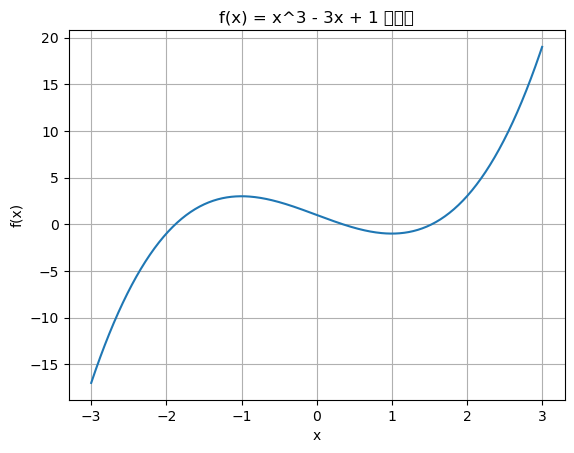

TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 12%|█▏        | 9/76 [22:55<2:54:02, 155.85s/it]

[False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, True, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 13%|█▎        | 10/76 [25:30<2:51:01, 155.48s/it]

[False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, True, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 14%|█▍        | 11/76 [28:03<2:47:41, 154.79s/it]

[True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, True, True, False, True, False, True, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 16%|█▌        | 12/76 [30:27<2:41:42, 151.61s/it]

[False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 17%|█▋        | 13/76 [33:12<2:43:21, 155.57s/it]

[False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 18%|█▊        | 14/76 [36:49<2:59:45, 173.97s/it]

[False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, True, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 20%|█▉        | 15/76 [39:11<2:47:19, 164.59s/it]

[True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 21%|██        | 16/76 [41:49<2:42:27, 162.45s/it]

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 22%|██▏       | 17/76 [44:26<2:38:16, 160.96s/it]

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 24%|██▎       | 18/76 [46:50<2:30:29, 155.69s/it]

[False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 25%|██▌       | 19/76 [49:15<2:24:58, 152.61s/it]

[False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 26%|██▋       | 20/76 [51:56<2:24:43, 155.05s/it]

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True]
TIR succeeded !
TIR succeeded !
TIR succeeded !
api error occured!
api error occured!
api error occured!
TIR succeeded !
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured

 28%|██▊       | 21/76 [54:15<2:17:49, 150.36s/it]

[False, True, False, False, False, False, False, "'line_number'", 'can only concatenate str (not "NoneType") to str', False, False, False, False, "'hint_type'", 'can only concatenate str (not "NoneType") to str', False, False, 'can only concatenate str (not "NoneType") to str', "'hint_type'", 'can only concatenate str (not "NoneType") to str', False, False, False, False, False, "'hint_type'", False, "'hint_type'", False, False, True, False, False, False, "'hint_type'", 'can only concatenate str (not "NoneType") to str', False, False, False, False, False, False, False, False, False, False, False, False, "'line_number'", False, False, False, False, False, False, True, "'hint_type'", False, "'hint_type'", False, False, "'hint_type'", False, "'hint_type'", False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, 'can only concatenate str (not "NoneType") to str', False, False, False, False, True, False, True, False, False, False,

 29%|██▉       | 22/76 [56:55<2:17:41, 153.00s/it]

[False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 30%|███       | 23/76 [59:24<2:14:05, 151.81s/it]

[False, True, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 32%|███▏      | 24/76 [1:02:08<2:14:55, 155.68s/it]

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 33%|███▎      | 25/76 [1:04:38<2:10:49, 153.90s/it]

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 34%|███▍      | 26/76 [1:07:17<2:09:30, 155.41s/it]

[False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False]
TIR succeeded !
TIR succeeded !TIR succeeded !

TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 36%|███▌      | 27/76 [1:09:52<2:06:43, 155.18s/it]

[False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 37%|███▋      | 28/76 [1:12:27<2:04:16, 155.34s/it]

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 38%|███▊      | 29/76 [1:15:04<2:01:58, 155.70s/it]

[False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 39%|███▉      | 30/76 [1:17:47<2:01:10, 158.06s/it]

[False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False]
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api err

 41%|████      | 31/76 [1:19:17<1:43:09, 137.54s/it]

["Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", False, False, False, "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", False, False, False, False, True, False, "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", False, False, False, False, "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", "Error code: 429 - {'error': {'message': 'Model busy, ret

 42%|████▏     | 32/76 [1:21:30<1:39:53, 136.21s/it]

[False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", False, False, False, "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", False, False, "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", False, False, "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", False, "Error code: 429 - {'error': {'

 43%|████▎     | 33/76 [1:24:01<1:40:45, 140.59s/it]

[False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 45%|████▍     | 34/76 [1:26:29<1:39:59, 142.85s/it]

[False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 46%|████▌     | 35/76 [1:29:01<1:39:23, 145.44s/it]

[False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 47%|████▋     | 36/76 [1:31:30<1:37:48, 146.71s/it]

[False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False]
TIR succeeded !


<string>:33: RuntimeWarning: overflow encountered in scalar power
<string>:33: RuntimeWarning: invalid value encountered in scalar subtract


TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 49%|████▊     | 37/76 [1:34:20<1:39:54, 153.69s/it]

[False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 50%|█████     | 38/76 [1:36:57<1:37:52, 154.55s/it]

[False, True, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, True, True, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 51%|█████▏    | 39/76 [1:39:32<1:35:27, 154.79s/it]

[False, False, False, False, True, True, False, False, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 53%|█████▎    | 40/76 [1:42:19<1:35:02, 158.39s/it]

[False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, True, False, True, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 54%|█████▍    | 41/76 [1:44:54<1:31:47, 157.35s/it]

[False, False, False, False, False, True, False, False, False, True, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 55%|█████▌    | 42/76 [1:47:12<1:25:51, 151.50s/it]

[False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 57%|█████▋    | 43/76 [1:49:45<1:23:35, 151.97s/it]

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, True, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 58%|█████▊    | 44/76 [1:52:18<1:21:11, 152.23s/it]

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 59%|█████▉    | 45/76 [1:54:52<1:18:55, 152.75s/it]

[False, False, False, True, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 61%|██████    | 46/76 [1:57:20<1:15:42, 151.41s/it]

[False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 62%|██████▏   | 47/76 [1:59:43<1:12:01, 149.03s/it]

[False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 63%|██████▎   | 48/76 [2:02:07<1:08:45, 147.33s/it]

[False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 64%|██████▍   | 49/76 [2:04:37<1:06:44, 148.33s/it]

[False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 66%|██████▌   | 50/76 [2:07:13<1:05:10, 150.41s/it]

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
TIR succeeded !api error occured!
api error occured!
api error occured!
api error occured!

api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api 

 67%|██████▋   | 51/76 [2:09:23<1:00:07, 144.31s/it]

[False, False, False, False, False, False, False, False, False, False, True, False, False, "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", False, False, False, False, "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", False, False, "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", False, False, False, "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", False, "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", False, False, False, False, False, False, "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", False, False, False, False, False, "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", False, False, False, True, False, False, False, False, "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", False, "Error code: 429 - {'error': {'message': 'Model busy, retry l

 68%|██████▊   | 52/76 [2:12:11<1:00:34, 151.46s/it]

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 70%|██████▉   | 53/76 [2:14:39<57:38, 150.38s/it]  

[False, False, False, False, True, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 71%|███████   | 54/76 [2:17:19<56:15, 153.43s/it]

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 72%|███████▏  | 55/76 [2:19:47<53:08, 151.82s/it]

[False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 74%|███████▎  | 56/76 [2:21:59<48:34, 145.71s/it]

[True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


 75%|███████▌  | 57/76 [2:24:20<45:40, 144.23s/it]

[False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, True, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, True, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False]
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api err

 76%|███████▋  | 58/76 [2:25:33<36:53, 122.94s/it]

["Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", False, False, "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", False, True, False, "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", False, "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", False, False, False, "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", "Error code: 4

 78%|███████▊  | 59/76 [2:28:19<38:31, 135.97s/it]

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False]
TIR succeeded !
TIR succeeded !
api error occured!
api error occured!
TIR succeeded !
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
api error occured!
TIR succeeded !
TIR succeeded !
TIR succeeded

 79%|███████▉  | 60/76 [2:30:54<37:44, 141.54s/it]

[False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", True, False, False, False, "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", False, False, False, False, "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", False, "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", "Error code: 429 - {'error': {'message': 'Model busy, retry later'}}", False, False, False, False, False, "Error code: 429 - {'error': {'message': 'Model

 80%|████████  | 61/76 [2:33:21<35:47, 143.18s/it]

[False, False, False, False, True, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, True, False, False, False, True, True, False, False, False, True, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True]
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !
TIR succeeded !


In [ ]:
%%time
for i in tqdm(range(math.ceil(len(data_list)/100))):
    start = 100*i
    end = 100*(i+1) 
    return_val = parallelize(get_tir, all_q[start:end] , all_r[start:end], all_a[start:end])
    time.sleep(10)
    print(return_val)

In [6]:
# print(return_val)

In [ ]:
def save_unique(dict_list, name = "xx.json"):
    json_unique = []
    st = set()
    for item in dict_list:
        if item["q"] in st:
            pass
        else:
            st.add(item["q"])
            json_unique.append(item)
    print(f"final length: {len(json_unique)}")
    with open(name, "w") as f:
        json.dump(json_unique, f , indent = 4)
        
save_unique(TIR_FULL_RESPONSES, target_TIR_json)
save_unique(AFTER_ROUND_RESPONSES, not_worked_json)